In [1]:
import pandas as pd#lectura y escritura de datos
import numpy as np# para trabajar con matrices arreglos
import matplotlib.pyplot as plt#para los graficos

In [2]:
df=pd.read_csv('/content/drive/MyDrive/TESIS_PYTHON/PSICOLÓGICO/Psicologica.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.sample(14)

,edad,sexo,e_profesional,c_academico,trabaja,e_civil,personalidad,ansiedad,a_horas_clases,h_sueño,c_espacios,s_academica,Diagnostico
6,Más de 10 años,Masculino,EPIS,X,Sí,Soltero,Prepotencia,Trabajos grupales,Desmotivado,Menos de 7 h,Jugar algún deporte,Exigencia del curso,Saludable
24,Más de 10 años,Masculino,EPIS,X,Sí,Soltero,Flexibilidad,Exposiciones finales,Desinterés por las clases,Menos de 7 h,Ausencia de lugares para sentirte mejor,Carga de horario,No Saludable
263,Entre 08 a 10 años,Masculino,EPC,II,Sí,Soltero,Prepotencia,Exposiciones finales,Desmotivado,Menos de 7 h,Jugar algún deporte,Carga de horario,Saludable
190,Más de 10 años,Masculino,EPAE,V,Sí,Soltero,Flexibilidad,Trabajos finales,Fatiga o cansancio,Menos de 7 h,Jugar videojuegos,Dificultad para concentrarte,No Saludable
4,Más de 10 años,Masculino,EPIS,IX,Sí,Soltero,Empatía,Trabajos grupales,Fatiga o cansancio,7 a 8 h,Ausencia de lugares para sentirte mejor,Dificultad con el material de estudio,No Saludable
164,Entre 08 a 10 años,Femenino,EPAE,VIII,No,Soltero,Empatía,Trabajos grupales,Desmotivado,7 a 8 h,Jugar videojuegos,Dejas a última hora las tareas,Saludable
206,Entre 08 a 10 años,Femenino,EPAE,VIII,No,Soltero,Prepotencia,Trabajos grupales,Expresión de desvelado u ojeroso,7 a 8 h,No me alcanza tiempo,Dificultad para concentrarte,No Saludable
203,Más de 10 años,Masculino,EPAE,VIII,Sí,Soltero,Intolerancia,Trabajos finales,Fatiga o cansancio,7 a 8 h,No me alcanza tiempo,Dejas a última hora las tareas,No Saludable
79,Entre 08 a 10 años,Femenino,EPIA,II,Sí,Soltero,Empatía,Trabajos grupales,Expresión de desvelado u ojeroso,7 a 8 h,Bailar,Dificultad para concentrarte,Saludable
227,Más de 10 años,Masculino,EPC,V,No,Soltero,Intolerancia,Trabajos grupales,Desinterés por las clases,Menos de 7 h,Bailar,Carga de horario,Saludable


Visualización de datos

No Saludable    184
Saludable       139
Name: Diagnostico, dtype: int64


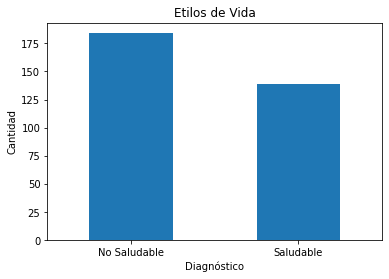

In [5]:
#Exploración de datos: Cantidad de la clase de la variable de salida
clases=pd.value_counts(df['Diagnostico'], sort=True)
print(clases)
clases.plot(kind='bar', rot=0)
plt.title('Etilos de Vida')
plt.ylabel('Cantidad')
plt.xlabel('Diagnóstico')
LABELS=np.array(['No Saludable','Saludable'])
plt.xticks(range(2),LABELS)
plt.show()

In [6]:
#1.- PROCESAMIENTO DE DATOS
#Verificación de datos faltantes
contador=df.isnull().sum()
contador

edad              0
sexo              0
e_profesional     0
c_academico       0
trabaja           0
e_civil           0
personalidad      0
ansiedad          0
a_horas_clases    0
h_sueño           0
c_espacios        0
s_academica       0
Diagnostico       0
dtype: int64

In [7]:
#Eliminación de columnas no relevantes, porque no aportan en el diagnóstico
df.drop(['edad','sexo','e_profesional','c_academico','trabaja','e_civil'], axis = 1, inplace=True)

In [8]:
df.columns

Index(['personalidad', 'ansiedad', 'a_horas_clases', 'h_sueño', 'c_espacios',
       's_academica', 'Diagnostico'],
      dtype='object')

In [9]:
#valores unicos de una de las características v_frutas
pd.unique(df['ansiedad'])

array(['Trabajos finales', 'Exposiciones finales', 'Trabajos grupales',
       'Exámenes'], dtype=object)

In [10]:
#PSICOLÓGICA: Reemplazando con valores ordinales
df['personalidad'].replace(( 'Intolerancia','Flexibilidad','Prepotencia', 'Empatía'),(0,1,2,3), inplace = True)
df['ansiedad'].replace(('Exposiciones finales', 'Trabajos finales', 'Exámenes', 'Trabajos grupales'),(0,1,2,3), inplace = True)
df['a_horas_clases'].replace(('Fatiga o cansancio','Expresión de desvelado u ojeroso','Expresión de deprimido','Desmotivado','Desinterés por las clases'),(0,1,2,3,4), inplace = True)
df['h_sueño'].replace(('Menos de 7 h', '7 a 8 h', 'Más de 8 h'),(0,1,2),inplace = True)
df['c_espacios'].replace(('No me alcanza tiempo','Ausencia de lugares para sentirte mejor','Jugar videojuegos','Bailar','Jugar algún deporte'),(0,1,2,3,4), inplace =  True)
df['s_academica'].replace(( 'Dejas a última hora las tareas','Dificultad para concentrarte','Dificultad con el material de estudio', 'Exigencia del curso','Carga de horario'),(0,1,2,3,4), inplace = True)
#TARGET: Reemplazando con valores binarios
df['Diagnostico'].replace(('No Saludable', 'Saludable'),(0,1),inplace = True)

In [11]:
df.head()

,personalidad,ansiedad,a_horas_clases,h_sueño,c_espacios,s_academica,Diagnostico
0,0,1,4,2,1,1,0
1,0,0,0,2,3,0,0
2,0,1,0,1,2,1,0
3,2,1,2,0,0,3,0
4,3,3,0,1,1,2,0


In [12]:
#Separación de atributos y la variable de salida
from sklearn.model_selection import train_test_split
x=df.drop(['Diagnostico'],axis=1)
y=df[['Diagnostico']]

In [13]:
#separación de datos para etapas de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=5)
len(x_train)

258

In [14]:
#Cantidad de la clase del target antes del Sobremuestreo
before_train=pd.value_counts(y_train['Diagnostico'], sort=True)
before_train

0    151
1    107
Name: Diagnostico, dtype: int64

In [15]:
pd.value_counts(df['Diagnostico'], sort= True)

0    184
1    139
Name: Diagnostico, dtype: int64

In [16]:
#1.1.- BALANCEO DE DATOS: Met. Sobremuestreo
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x_train_os, y_train_os = os.fit_resample(x_train, y_train)
balanceado=pd.value_counts(y_train_os['Diagnostico'], sort=True)
print(balanceado)

0    151
1    151
Name: Diagnostico, dtype: int64


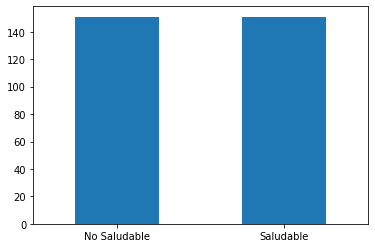

In [17]:
#juntando en un dataframe los resultados
df_balanceado = pd.DataFrame(data=x_train_os, columns=df.drop(['Diagnostico'], axis=1).columns)
df_balanceado['Diagnostico']=y_train_os
clases=pd.value_counts(df_balanceado['Diagnostico'], sort=True)
clases.plot(kind="bar", rot=0)
LABELS=np.array(['No Saludable','Saludable'])
plt.xticks(range(2), LABELS)
plt.show()

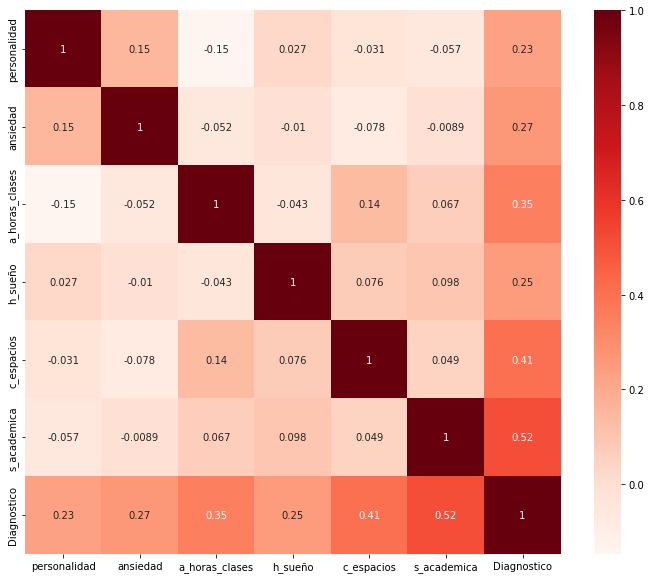

In [18]:
#1.2.- SELECCION DE CARACTERISTICAS:  A través de filtros de correlación , para lo
#cual procederemos a crear un nuevo bloque de código y
#graficar a través de la herramienta seaborn la matriz de
#correlación de las variables.
import seaborn as sns
plt.figure(figsize=(12,10))
cor=df_balanceado.corr()
sns.heatmap (cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [19]:
#Almacenando los valores de correlación con respecto a
#la variable de salida Diagnostico
correlacion=abs(cor["Diagnostico"])
correlacion

personalidad      0.229965
ansiedad          0.265586
a_horas_clases    0.348665
h_sueño           0.247959
c_espacios        0.405363
s_academica       0.515402
Diagnostico       1.000000
Name: Diagnostico, dtype: float64

In [20]:
#Realización de filtro de los atributos que posean un grado de
#correlación mayor a 0.4
car_relevantes = correlacion[correlacion>0.4]
car_relevantes

c_espacios     0.405363
s_academica    0.515402
Diagnostico    1.000000
Name: Diagnostico, dtype: float64

In [21]:
#Verificacion de la correlacion de las variables seleccionadas
df_balanceado[['s_academica','c_espacios']].corr()

,s_academica,c_espacios
s_academica,1.000000,0.049049
c_espacios,0.049049,1.000000


In [22]:
df_seleccion = df_balanceado[['s_academica','c_espacios','Diagnostico']]
df_seleccion.to_csv('/content/drive/MyDrive/TESIS_PYTHON/PSICOLÓGICO/balanced_psico_selection.csv', index=False)

In [23]:
#exportacion del dataset de prueba
df_prueba = pd.DataFrame(data=x_test, columns=df.drop(['Diagnostico'], axis=1).columns)
df_prueba['Diagnostico']=y_test
df_prueba.to_csv('/content/drive/MyDrive/TESIS_PYTHON/PSICOLÓGICO/psico_test.csv', index= False)

CROSS VALIDATION

In [24]:
x = df_seleccion.drop(['Diagnostico'], axis=1)
y = df_seleccion['Diagnostico']

In [25]:
from sklearn.svm import SVC
SVC = SVC(gamma='auto', C=2.0, kernel='linear')
from sklearn.model_selection import cross_val_score

SVC.fit(x,y)
print(SVC.score(x,y))
print(cross_val_score(SVC, x,y, cv=5).mean())

0.7913907284768212
0.7751366120218579


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

print(knn.score(x,y))
print(cross_val_score(knn, x,y, cv=5).mean())

0.7880794701986755
0.7353005464480875


In [27]:
from sklearn import tree
tr = tree.DecisionTreeClassifier(max_depth=10)
tr.fit(x,y)

print(tr.score(x,y))
print(cross_val_score(tr, x,y, cv=5).mean())

0.804635761589404
0.7716939890710383
